### 1. Iris数据集
Iris Data Set（鸢尾属植物数据集）首次出现在著名的英国统计学家和生物学家Ronald Fisher 1936年的论文《The use of multiple measurements in taxonomic problems》中，被用来介绍线性判别式分析。在这个数据集中，包括了三类不同的鸢尾属植物：Iris Setosa，Iris Versicolour，Iris Virginica。每类收集了50个样本，因此这个数据集一共包含了150个样本。

#### 1.1 特征和样本量
该数据集测量了所有150个样本的4个特征，分别是：

- sepal length（花萼长度）
- sepal width（花萼宽度）
- petal length（花瓣长度）
- petal width（花瓣宽度）
以上四个特征的单位都是厘米（cm）。

通常使用$m$表示样本量的大小，$n$表示每个样本所具有的特征数。因此在该数据集中，$m=150,n=4$

#### 1.2 利用scikit-learn导入数据集

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
print(dir(data))  # 查看data所具有的属性或方法

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [2]:
# 导入pandas包
import pandas as pd
#直接读到pandas的数据框中
data_df = pd.DataFrame(data=data.data, columns=data.feature_names)
print(data_df.shape)
data_df.head(2)

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


#### 1.3 数据的可视化展示
仅使用花瓣的长度和宽度信息

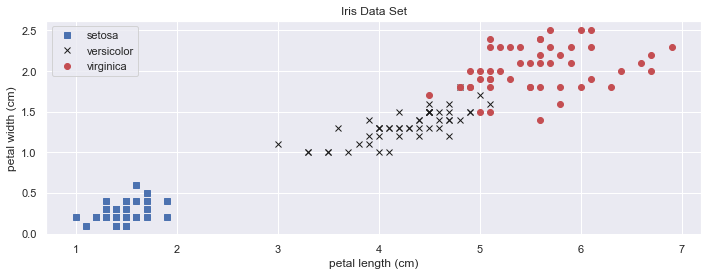

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# plt.style.use('ggplot')


X = data.data  # 只包括样本的特征，150x4
y = data.target  # 样本的类型，[0, 1, 2]
features = data.feature_names  # 4个特征的名称
targets = data.target_names  # 3类鸢尾花的名称，跟y中的3个数字对应

plt.figure(figsize=(10, 4))
plt.plot(X[:, 2][y==0], X[:, 3][y==0], 'bs', label=targets[0])
plt.plot(X[:, 2][y==1], X[:, 3][y==1], 'kx', label=targets[1])
plt.plot(X[:, 2][y==2], X[:, 3][y==2], 'ro', label=targets[2])
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.title('Iris Data Set')
plt.legend()
plt.tight_layout()
# plt.savefig('Iris Data Set.png', dpi=200)
plt.show()

#### 1.4 降维后的可视化
利用[t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE)降维

In [4]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(150, 2)

In [5]:
def plot_tsne(X, y, targets):
    plt.figure(figsize=(6, 8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs', label=targets[0])
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'kx', label=targets[1])
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'ro', label=targets[2])
    plt.xlabel('t-SNE1')
    plt.ylabel('t-SNE2')
    plt.title('Dimension reduction of Iris Data Set by t-SNE')
    plt.legend()
    plt.tight_layout()
    # plt.savefig('Iris Data Set.png', dpi=200)
    plt.show()

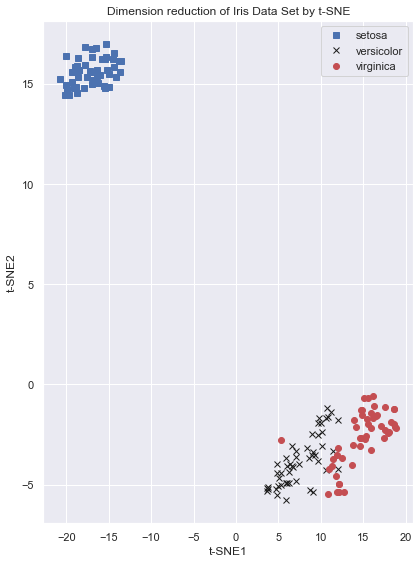

In [6]:
plot_tsne(X=X_embedded, y=y, targets=targets)

### 2. 线性回归
回归分析是一类基于预测变量 (predictor variables)(a.k.a 解释变量（explanatory variables）、自变量 (independent variables)或回归量 (regressors))来预测一个或多个响应变量 (response variable)(a.k.a 因变量(dependent variable)、被解释变量 (explained variable)或回归应变量 (regressand) ) 的统计方法。

之所以称该方法为线性模型，是因为该模型的基本假设为：因变量是由所有自变量的线性组合构成的。

#### 2.1 基本形式
##### 2.1.1 简单线性回归（simple linear regression）：
- 一个自变量，一个因变量

最简单的线性回归就是直接利用一条直线拟合二维平面上的一系列点，目的是利用这条直线概括所有训练集中样本的散布规律或趋势，最终用于新样本点的预测。

二维平面上直线方程的一般形式为$y=ax+b$，使用训练集中的数据以某种方式训练该模型后，就可以确定方程中的两个参数$a,b$的最优值。后面如果观察到了新的样本$x_i$，就可以带入上面学习到的公式计算$y$的值。

##### 2.1.2 多重线性回归（multiple linear regression）：
- 多个自变量，一个因变量，例如预测房价

多重线性总体回归模型假设的基本形式：

$$\hat{y} = h_{\theta}(x) = \theta_0 + \theta_1x_1 + \cdots + \theta_nx_n + e \quad \cdots \ (2-1)$$

- 其中，$\hat{y}$表示线性回归模型的预测值（相对于真实观察值）;
- $n$表示特征（自变量）的个数;
- $x_i$表示第$i$个特征的观察值;
- $\theta_j$表示第$j$个参数的值.
- $e$表示随机误差项，一般假设$e \sim (0, \sigma^2)$

如果模型包括$n$个特征，那么就会包括$n+1$个参数，还包括常数项（还被称为截距）。

当我们对总体进行随机抽样时，假设有$m$个个体，每个个体有模型：
$$\hat{y}^{(i)} = h_{\theta}(x^{(i)}) = \theta_0 + \theta_1x_1^{(i)} + \cdots + \theta_nx_n^{(i)} + e \quad \cdots \ (2-2)$$
表示成矩阵形式有：
$$\begin{pmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \end{pmatrix} = 
\begin{pmatrix} 1 \ x_1^{(1)} \cdots x_n^{(1)} \\ 1 \ x_1^{(2)} \cdots x_n^{(2)}  \\ \vdots \\ 1 \ x_1^{(m)} \cdots x_n^{(m)} \end{pmatrix} \theta + 
\begin{pmatrix} e^{(1)} \\ e^{(2)} \\ \vdots \\ e^{(m)} \end{pmatrix} 
<=> Y_{m \times 1} = X_{m \times n}\theta + \epsilon \quad \cdots \
(2-3)$$

- $X$是$m \times (n+1)$的矩阵，其中$m$表示样本的数量;
- $\theta$是包含所有参数的列向量，长度为$n+1$.

其中，$y^{(i)},x_1^{(i)}, \cdots, x_n^{(i)}$表示对总体变量$y,x_1, \cdots, x_n$的独立重复观测。

##### 2.1.3 多元线性回归（multivariate linear regression）：
- 多个自变量，多个因变量

设有$p$个响应变量，$Y_1, \cdots, Y_p$；$n$个解释变量，$x_1, \cdots, x_n$,考虑解释变量与响应变量之间的关系, 假设有如下总体回归模型:
$$\begin{array} \\
Y_1 = \theta_{01} + \theta_{11}x_1 + \cdots + \theta_{n1}x_n + e_1 \\
Y_2 = \theta_{02} + \theta_{12}x_1 + \cdots + \theta_{n2}x_n + e_2 \\
\vdots \\
Y_p = \theta_{0p} + \theta_{1p}x_1 + \cdots + \theta_{np}x_n + e_p \end{array}
\quad \cdots \ (2-4)
$$
也就是假设每一个响应变量$Y_i$和解释变量之间存在线性关系。误差项服从均值为0的正态分布。

当对总体中$m$个个体进行观测时，即第$i$次观测样本的解释变量为$x_1^{(i)}, x_2^{(i)}, \cdots, x_n^{(i)}$，响应变量记为$y^{(i)} = y_1^{(i)}, y_2^{(i)}, \cdots, y_p^{(i)}$. 使用矩阵表示：
$$
Y_{m \times p} = \begin{pmatrix} y_1^{(1)} \ y_2^{(1)} \cdots y_p^{(1)} \\ y_1^{(2)} \ y_2^{(2)} \cdots y_p^{(2)}  \\ \vdots \\ y_1^{(m)} \ y_2^{(m)} \cdots y_p^{(m)} \end{pmatrix}
$$

$$
X_{m \times (n+1)} = \begin{pmatrix} x_0^{(1)} \ x_1^{(1)} \cdots x_n^{(1)} \\ x_0^{(2)} \ x_1^{(2)} \cdots x_n^{(2)}  \\ \vdots \\ x_0^{(m)} \ x_1^{(m)} \cdots x_n^{(m)} \end{pmatrix} \quad \cdots \ (2-5)
$$
其中$x_0^{(i)}\equiv 0, i \in \{1, \cdots, m\}$

参数矩阵记为：
$$
\theta_{(n+1) \times p} = \begin{pmatrix} \theta_{01} + \theta_{02} + \cdots + \theta_{0p} \\
 \theta_{11} + \theta_{12} + \cdots + \theta_{1p} \\
 \vdots \\
 \theta_{n1} + \theta_{n2} + \cdots + \theta_{np} \end{pmatrix} = 
 [\theta_{(1)}, \theta_{(2)}, \cdots, \theta_{(p)}]
 \quad \cdots \ (2-6)
$$
从而，多元线性回归模型的矩阵表示为：
$$\begin{array}{l}
Y_{m \times p} = X_{m \times (n+1)} \theta_{(n+1) \times p} + \epsilon_{m \times p}\\
= [X \cdot \theta_{(1)}, \cdots, X \cdot \theta_{(p)}] + [\epsilon_{(1)}, \cdots, \epsilon_{(p)}] \end{array}
\quad \cdots \ (2-7)
$$

#### 2.2 线性回归的代价函数
代价函数量化了模型预测值与实际观察值之间的误差大小。有了代价函数就可以评价取当前参数时模型性能的好坏。

在选择一个恰当的代价函数后，整个模型的训练过程就是求代价函数最小值的过程。这个过程并不容易，可能会出现下面两种情况：

- 得到全局最优解：即代价函数的最小值；
- 得到局部最优解：由于很多原因我们可能仅仅只能求的代价函数在某个区间内的极小值.

如果代价函数是一个凸函数（convex function），那么从数学上可以保证肯定能求得全局最优解；如果代价函数是非凸函数，就无法从理论上保证最终能得到代价函数的全局最优解（NP-hard问题）。

对于线性回归算法，比较常用的代价函数是均方误差(Mean Square Error, MSE)函数：
$$J(\theta) = MSE(X, h_{\theta}) = \frac{1}{2m}\sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2} = \frac{1}{2m}\sum_{i=1}^{m}{(\theta^T \cdot x^{(i)} - y^{(i)})^2} \quad \cdots \ (2-3)$$

- 上式表示所有模型的预测值与实际观察值之差的平方和，因此训练集中任何一个实际观察值与模型预测值之间的误差都包含在了这个公式中；
- 为了求导方便，添加了一个系数$\frac{1}{2}$，实际的MSE的定义中是没有的；
- 该函数是一个凸函数.

<img src="./fig/Fig1.jpg" style="height: 400px;"/>

- 均方误差就是上图中绿色线段长度平方和的均值

### 3. 利用梯度下降优化参数
- 梯度下降的一般步骤
1. 参数的初始化：通常所有参数都初始化为1；
2. 确定学习率；
3. 求代价函数的梯度（所有参数的偏导数）；
4. 所有参数都沿梯度方向移动一步，步长就是学习率的大小；
5. 重复步骤4直到参数不再发生变化（此时取到极值点，梯度为0）或达到预先设定的迭代次数.

<img src='./fig/cost_function_decreasing.gif' style="height: 200px;" />

图片来源：https://towardsdatascience.com/neural-networks-with-numpy-for-absolute-beginners-part-2-linear-regression-e53c0c7dea3a

#### 3.1 学习率
学习率一般用希腊字母$\alpha$表示，可能需要多次尝试，才能找到合适的学习率。过大的学习率会导致梯度下降时越过代价函数的最小值点，随着训练步数的增加，代价函数不减反增；如果学习率太小，训练中的每一步参数的变化会非常小，这时可以看到代价函数的值在不断减小，但是需要非常大的迭代次数才能到达代价函数的最小值点。

按照吴恩达老师的建议，每次可以3倍放大或者3倍缩小来调整，直到找到合适的学习率。
<img src='./fig/Fig2.png' style="height: 200px;" />

#### 3.2 代价函数的梯度
在机器学习中，对代价函数包含的每一个参数求偏导数，这些偏导数组成的向量就是代价函数的梯度。

- 均方误差函数的梯度

为了简单起见，先考虑只有一个特征的直线方程：$h_{(\theta)} = \theta_0 + \theta_1x_1$

令$x_0=1$，则可得$h_{(\theta)} = \theta_0x_0 + \theta_1x_1$
参考MSE的公式，见式子(2-3)，可得，
- $J(\theta)$对$\theta_0$的偏导数：
$$\frac{\partial}{\partial \theta_0} J(\theta) = \frac{1}{m} \sum_{i=1}^{m}{[(h_{\theta}(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)}]} \quad \cdots \ (3-1)$$

- $J(\theta)$对$\theta_1$的偏导数：
$$\frac{\partial}{\partial \theta_1} J(\theta) = \frac{1}{m} \sum_{i=1}^{m}{[(h_{\theta}(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)}]} \quad \cdots \ (3-2)$$

其中$m$表示样本数量；$y_i$表示第$i$个样本的观察值；$x_1^{(i)}$表示第$i$个样本的第1个特征的观察值；式子中的点号$\cdot$表示普通乘法。

<img src='./fig/Fig3.png' style="height: 400px;" />

#### 3.3 梯度的向量化表示
上面的方法显得有点繁琐，在代码中对两个参数分别求偏导数，并且分别更新它们的值，假如有100个参数，就要重复100次几乎相同的步骤。
因此这样的代码，可扩展性非常差。下面我们使用梯度和向量化的方式来重写梯度下降的实现过程。
通过比较两个参数的偏导数，即式子(3-1)和(3-2)，不难发现它们非常相似，如果把这些式子统一起来，所有参数的偏导数可以写成下面的样子：
$$\nabla_{\theta}MSE(\theta) = 
\begin{pmatrix} \frac{\partial}{\partial \theta_0} J(\theta) \\\frac{\partial}{\partial \theta_1} J(\theta) \\ \vdots \\ \frac{\partial}{\partial \theta_n} J(\theta) \end{pmatrix}
= \begin{pmatrix} \frac{1}{m} \sum_{i=1}^{m}{(\theta^T \cdot x^{(i)} - y^{(i)}) x^{(i)}_0} \\ \frac{1}{m} \sum_{i=1}^{m}{(\theta^T \cdot x^{(i)} - y^{(i)}) x^{(i)}_1} \\ \vdots \\ \frac{1}{m} \sum_{i=1}^{m}{(\theta^T \cdot x^{(i)} - y^{(i)}) x^{(i)}_n} \end{pmatrix} 
= \frac{1}{m} \begin{pmatrix} x_0^T \cdot e \\ 
x_1^T \cdot e \\ \vdots \\ x_n^T \cdot e \end{pmatrix} = \frac{1}{m} X^T \cdot e \quad \cdots \ 
(3-3)$$

上面式子中的倒三角是梯度的表示符号，其中，$x_n^T$表示所有样本第$n$个特征组成的向量的转置；
- $e = \hat{h} - y = (X \cdot \theta - y)$表示所有样本的误差；
- $\cdot$表示向量的点积（结果为一个标量）或矩阵乘法（结果为一个矩阵）。
通过该式的表示，就把所有参数的偏导数表示成了一个式子。参数更新的过程就可以表示如下：
$$\theta = \theta - \alpha\nabla_{\theta}MSE(\theta) \quad \cdots \ (3-4)$$

### 4. 梯度下降的实现
#### 4.1 示例1：利用花瓣的长度预测花瓣的宽度（利用偏导数逐个更新参数）

下面不再考虑不同鸢尾花的类型，而是使用花瓣的长度（相当于自变量x）来预测花瓣的宽度（相当于因变量y）。

下图中从所有150个样本中，随机取出了80%作为训练集：

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

# 分出一部分数据做测试集
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)
X_reg = X_train[:, 2].reshape(-1, 1)  # 花瓣长度
y_reg = X_train[:, 3].reshape(-1, 1)  # 花瓣宽度
X_reg.shape, y_reg.shape

((120, 1), (120, 1))

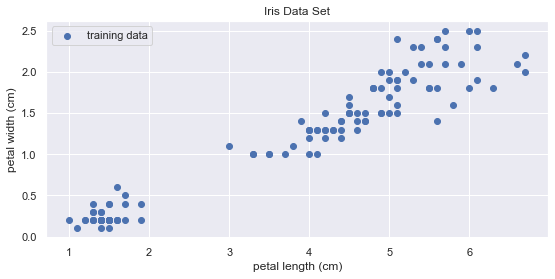

In [8]:
plt.figure(figsize=(9, 4))  # width, height in inches
n_set_plt = plt.scatter(X_reg, y_reg, c='b', label='training data')
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.title('Iris Data Set')
plt.legend(loc="upper left")
# plt.savefig('04_2_linear_svr1.png', dpi=200)
plt.show()

In [9]:
# 计算代价函数
def L_theta(theta, X_x0, y):
    delta = np.dot(X_x0, theta) - y  # np.dot 表示矩阵乘法
    L_theta = np.sum(np.multiply(delta, delta))
    return L_theta

def train_theta(x, y, T, theta, alpha):
    m = x.shape[0]
#     print(m)
    X_x0 = np.c_[np.ones((m, 1)), x]  # ADD X0 = 1 to each instance
    
    for i in range(T):
        theta_0 = theta[0, 0]
        theta_1 = theta[1, 0]
        h = np.dot(X_x0, theta)
        theta_0 -= alpha*(1/m * np.sum(h - y))  # 公式(3-1)
        theta_1 -= alpha*(1/m * np.sum(np.dot(np.transpose(x), h - y)))  # 公式(3-2)
        theta[0, 0] = theta_0
        theta[1, 0] = theta_1
        if i%100==0:
            print(L_theta(theta, X_x0, y))
    return theta

In [10]:
T = 1000  # 迭代次数
theta = np.ones((2, 1))  # 参数的初始化
alpha = 0.06  # 学习率

trained_theta = train_theta(x=X_reg, y=y_reg, T=T, theta=theta, alpha=alpha)

40.73951001849945
8.59711531423332
5.407923187864959
5.0046746553374835
4.95368701566501
4.947240025311254
4.946424853538482
4.946321781409833
4.946308748741066
4.946307100861493


In [11]:
trained_theta

array([[-0.35663028],
       [ 0.4132299 ]])

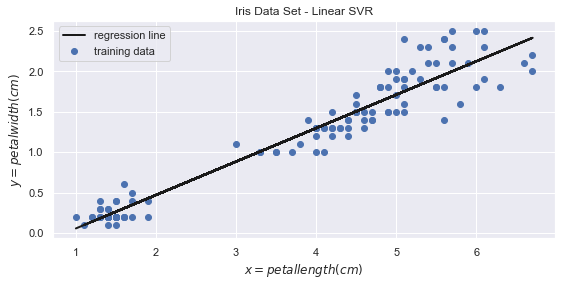

In [12]:
lw = 2
m = X_reg.shape[0]
y_pred = np.dot(np.c_[np.ones((m, 1)), X_reg], trained_theta)
plt.figure(figsize=(9, 4))  # width, height in inches
plt.scatter(X_reg, y_reg, color='b', label='training data')
plt.plot(X_reg, y_pred, color='k', lw=lw, label='regression line')
plt.xlabel(r"$x = {}$".format(features[2]), fontsize=12)
plt.ylabel(r"$y = {}$".format(features[3]), fontsize=12, rotation=90)  # 可以设置旋转角度
plt.title('Iris Data Set - Linear SVR')
plt.legend()
# plt.savefig('04_2_linear_svr2.png', dpi=200)
plt.show()

#### 4.2 示例2：利用花瓣的长度预测花瓣的宽度(利用梯度更新参数)

In [13]:
def train_theta_new(x, y, T, theta, alpha):
    m = x.shape[0]
#     print(m)
    X_x0 = np.c_[np.ones((m, 1)), x]  # ADD X0 = 1 to each instance
    
    for i in range(T):
        h = np.dot(X_x0, theta)
        theta -= alpha * 1/m * np.dot(X_x0.T, h - y)
        if i%100==0:
            print(L_theta(theta, X_x0, y))
    return theta

In [14]:
T = 1000  # 迭代次数
theta = np.ones((2, 1))  # 参数的初始化
alpha = 0.05  # 学习率

trained_theta_new = train_theta_new(x=X_reg, y=y_reg, T=T, theta=theta, alpha=alpha)
trained_theta_new

53.996318054513395
10.125038065935176
5.871956200667649
5.1117579475314106
4.975879682692263
4.951592724942061
4.9472516604056676
4.946475736080234
4.946337046928356
4.946312257551071


array([[-0.35645487],
       [ 0.4131909 ]])

#### 4.3 示例3：利用花瓣的长度预测花瓣的宽度(使用scikit-learn工具包)

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_reg, y_reg)
print(lin_reg.intercept_, lin_reg.coef_)

[-0.35666804] [[0.41323829]]


### references

- http://scikit-learn.org/stable/modules/linear_model.html
- Géron A. Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems[M]. " O'Reilly Media, Inc.", 2017. github
- https://www.hatarilabs.com/ih-en/how-to-calculate-the-root-mean-square-error-rmse-of-an-interpolated-ph-raster
- https://medium.com/@qempsil0914/machine-learning-notes-week2-multivariate-linear-regression-mse-gradient-descent-normal-e15785f771bd
- https://link.springer.com/article/10.1007/s13244-018-0639-9/figures/7
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE
- https://en.wikipedia.org/wiki/Linear_regression
- http://staff.ustc.edu.cn/~zwp/teach/MVA/Lec9_slides.pdf